In [ ]:
# vamos a CLASIFICAR y vamos a obtener una ESTIMACION con regresión

# ya hicimos una clasificación de este dataset con arboles.

# Clasificación de flores Iris

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
# sabemos que al final eran los pétalos las variables importantes que definían la clasificacion de los datos

In [4]:
X = iris.data[:, :2]
Y = iris.target

In [5]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1    # estoy definiendo los márgenes del dibujo
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1    # estoy definiendo los márgenes del dibujo
h = (x_max - x_min)/100                          # incremento entre el minimo y el máximo

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

In [10]:
X_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

In [21]:
C = 1
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

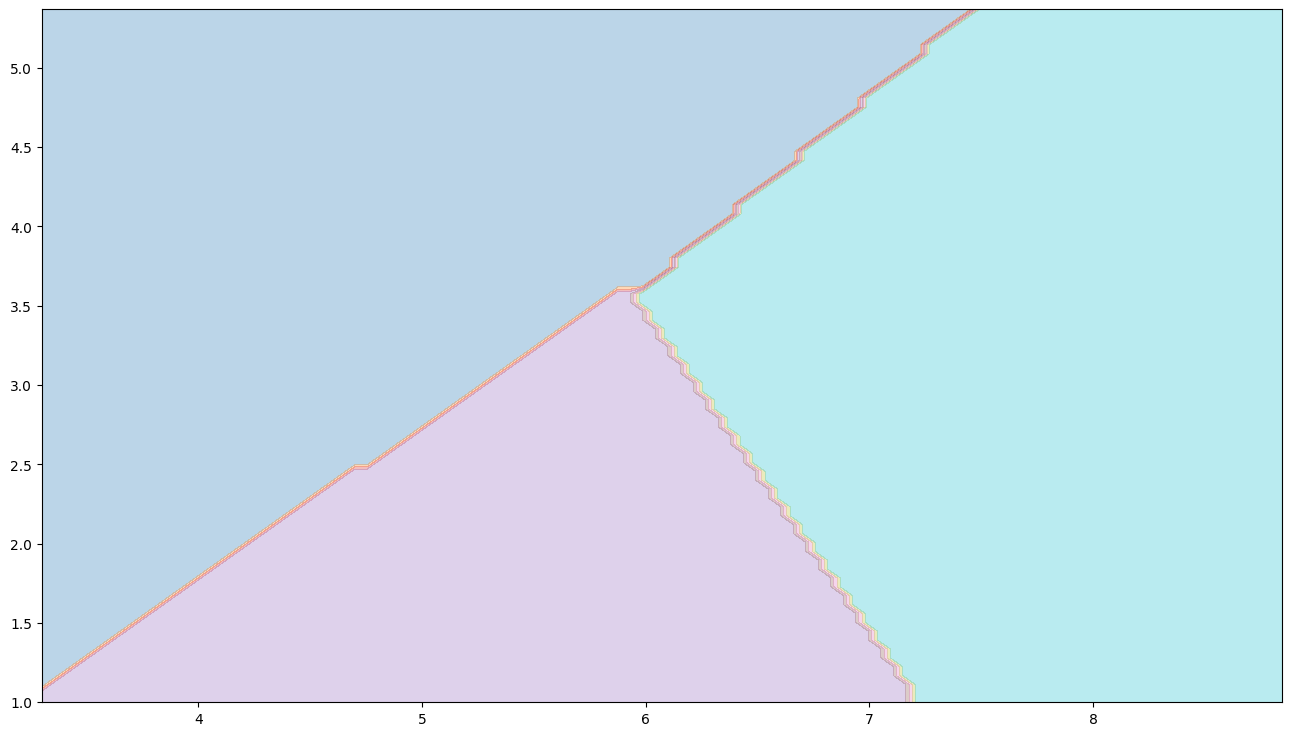

In [22]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

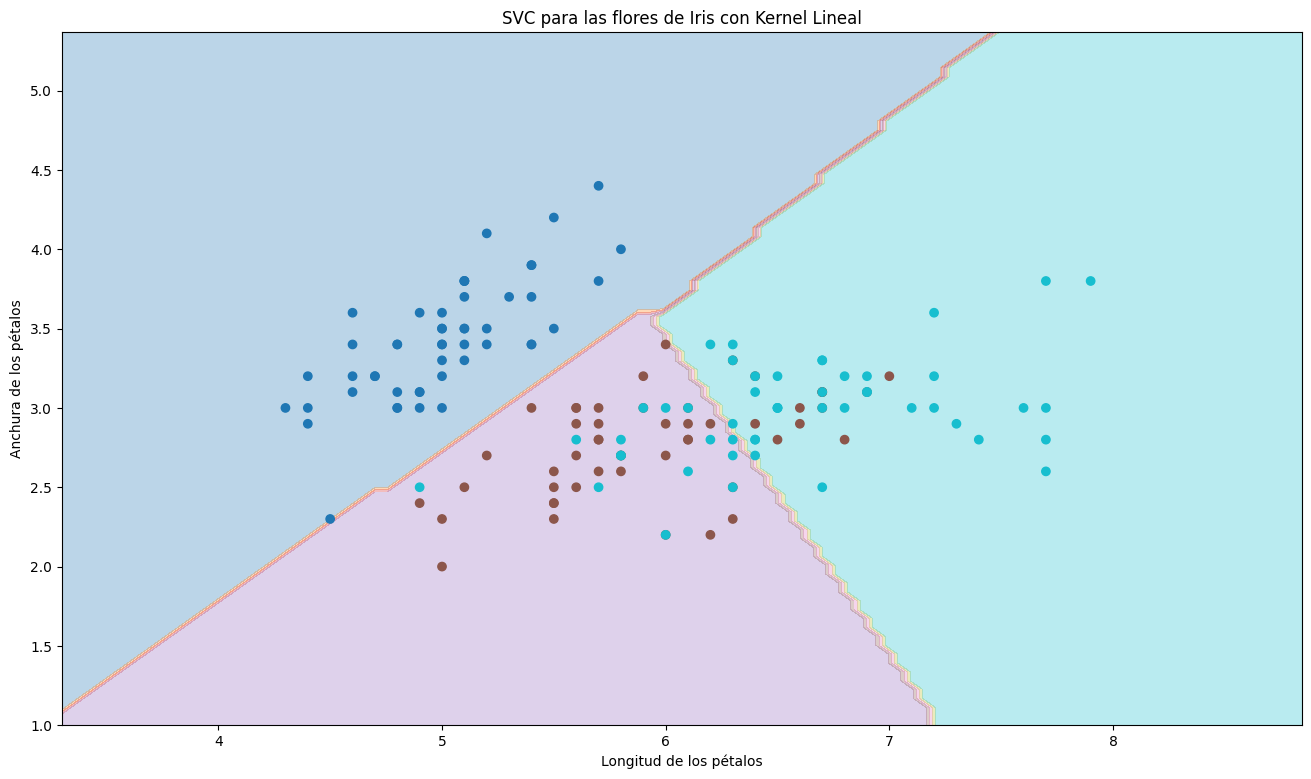

In [23]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

In [26]:
C = 1
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Radial')

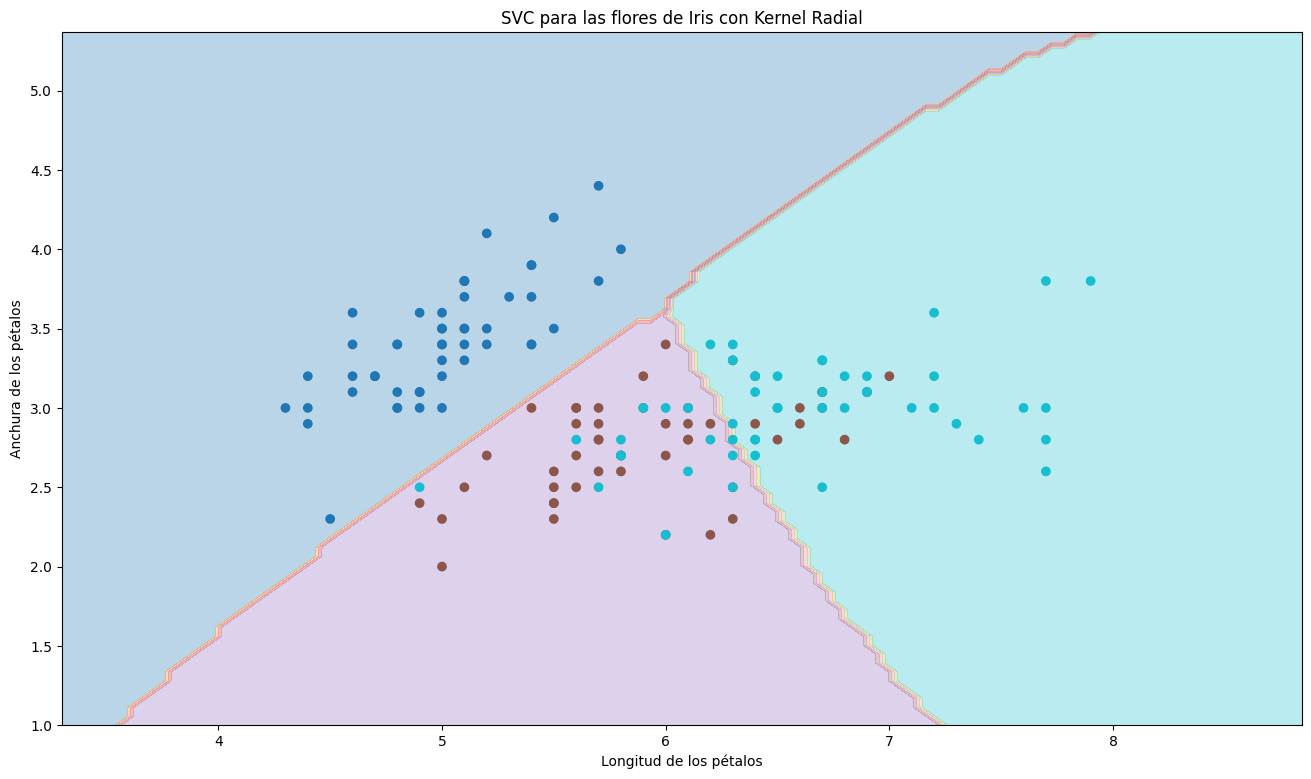

In [27]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial")

In [ ]:
# cuál es mejor, el radial o el linea???

In [28]:
C = 1
svc = svm.SVC(kernel="sigmoid", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoide')

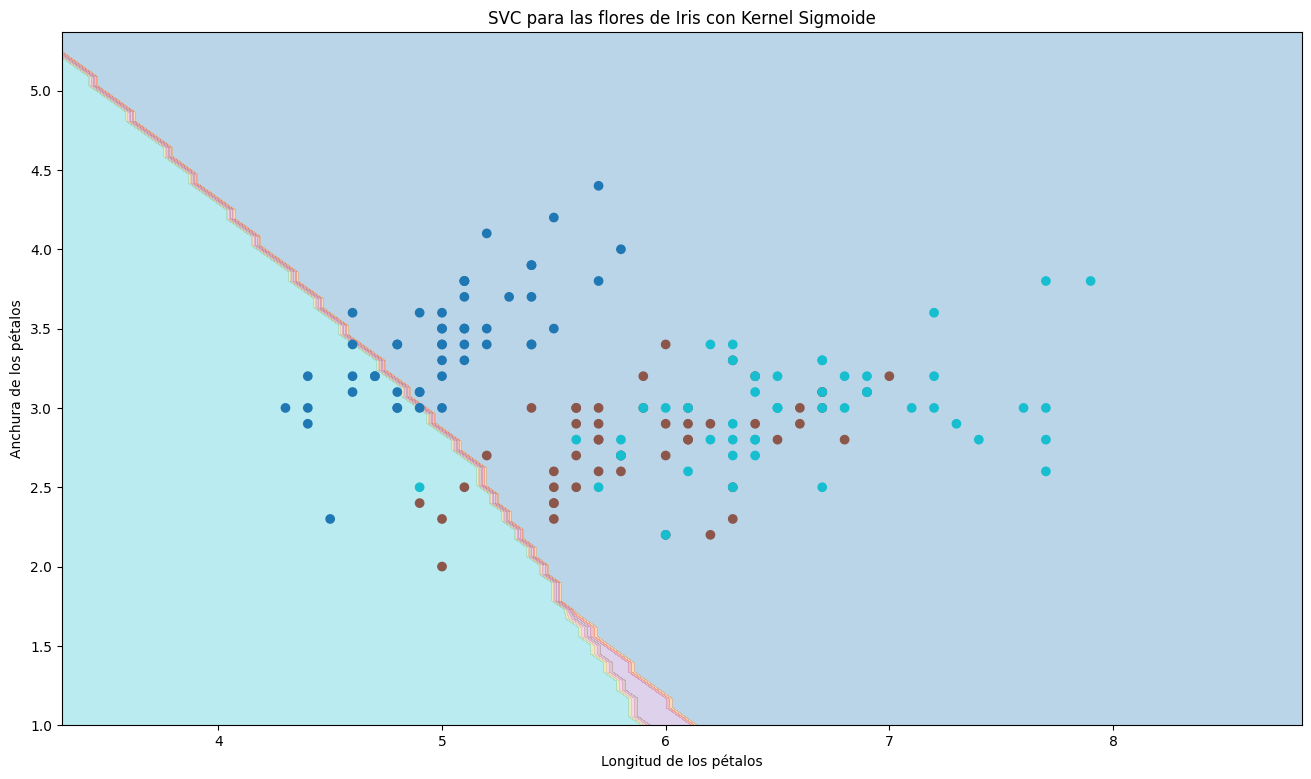

In [29]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Sigmoide")

In [ ]:
# esta muy mal

In [30]:
C = 1
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Polinomial')

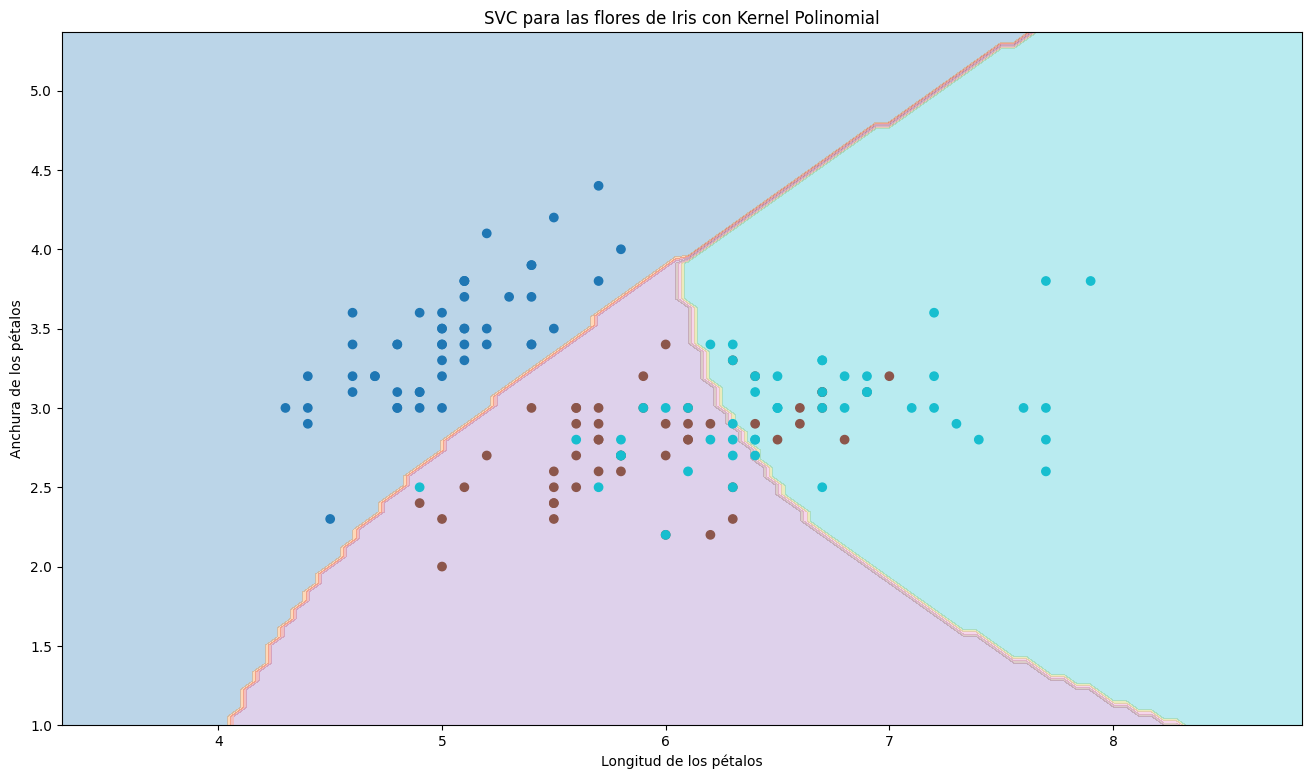

In [31]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Polinomial")

In [ ]:
# de todos los que hemos hecho nos quedariamos con el radial y la segunda etapa seria establecer cual serian los valores optimos para la representacion:

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [33]:
X, Y = shuffle(X,Y, random_state = 0)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [35]:
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2, 0.1, 0.2, 0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

In [36]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [37]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [38]:
clf.cv_results_

{'mean_fit_time': array([0.00262971, 0.00285482, 0.00237226, 0.00319443, 0.00110512,
        0.00106068, 0.00171895, 0.00144587, 0.0010859 , 0.00100274,
        0.00130434, 0.00142045, 0.00137825, 0.00120678, 0.00102196,
        0.00111055, 0.00121312, 0.00146627, 0.00110555, 0.00123143,
        0.00163536, 0.00198479, 0.00264912, 0.00270572, 0.00096188,
        0.00141287, 0.00200839, 0.00594068]),
 'std_fit_time': array([4.17640361e-04, 1.00661315e-03, 2.91519497e-04, 3.01009394e-03,
        3.37142418e-05, 3.15936195e-05, 3.80135360e-04, 1.39059696e-04,
        1.85400763e-05, 1.29462825e-05, 2.46402085e-04, 1.81842424e-04,
        2.54187752e-05, 1.90626865e-04, 3.31096715e-05, 5.07070975e-05,
        5.33834905e-05, 2.09311743e-04, 2.56452404e-05, 2.44955940e-04,
        8.17810341e-05, 4.37578249e-04, 6.80389790e-04, 7.16657038e-04,
        5.04631608e-05, 2.19161174e-04, 1.03436724e-03, 2.98408328e-03]),
 'mean_score_time': array([0.00147281, 0.00123796, 0.00177236, 0.00101552, 

In [39]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))

0.747 (+/-0.124) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.129) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.124) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.098) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 (+/-0.126) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.107) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.080) para {'C': 100, 'gamma'

In [ ]:
# aqui vemos que la clasificación buena coincide con los best parametros

In [40]:
y_pred = clf.predict(X_test)

In [41]:
print(classification_report(Y_test, y_pred, target_names=["setosa", "versicolor","virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



###TRUCO: QUÉ HACER CUANDO ME TOCA HACER UN ANALISIS DE DATOS

# Resumen final de la clasificación de Iris

In [60]:
def svm_iris(C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    
    
    X = iris.data[:, :2]
    Y = iris.target

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris con Kernel "+kernel + " con C= " +str(C)+ " y con gamma = "+ str(gamma))

In [58]:
from ipywidgets import interact, fixed

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>

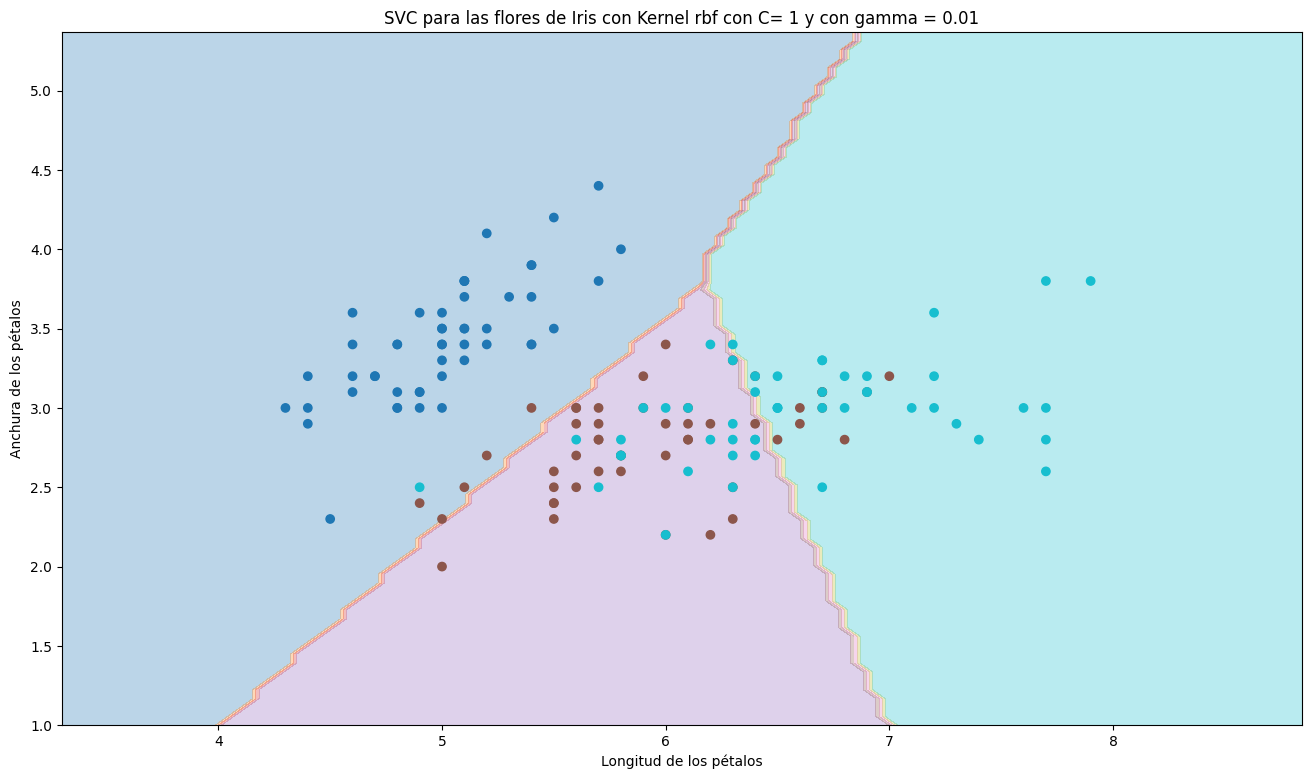

In [64]:
interact(svm_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])